In [1]:
import os
import pandas as pd
import numpy as np
import arff as ar
import matplotlib.pyplot as plt

In [69]:
np.random.seed(2)
output_folder = "output"

In [70]:
train_metadata = pd.read_csv("plasticc_train_meta.csv", index_col="object_id")
train_metadata.head()

,ra,decl,ddf,host_specz,host_photoz,host_photoz_error,mwebv,class,true_submodel,galactic,avg_g,avg_i,avg_r,avg_u,avg_y,avg_z,sigma,time_length
object_id,,,,,,,,,,,,,,,,,,
plasticc_000000615,349.0461,-61.9438,True,0.000,0.000,0.000,0.017,92,1,True,-419.781873,-132.243648,-168.992969,-4.717097,-53.759728,-65.294949,369.933851,1.499743
plasticc_000000713,53.0859,-27.7844,True,1.818,1.627,0.255,0.007,88,1,False,-0.906440,-0.767550,-0.688203,-2.906212,-2.023269,-0.853408,4.260782,29.462923
plasticc_000000730,33.5742,-6.5796,True,0.232,0.226,0.016,0.021,42,2,False,0.065090,0.659673,0.297222,-0.080564,1.662437,0.911248,11.930939,155.993677
plasticc_000000745,0.1899,-45.5867,True,0.304,0.281,1.152,0.007,90,1,False,0.843069,0.631372,-0.036218,0.765321,2.738334,0.604807,52.581154,92.035825
plasticc_000001124,352.7113,-63.8237,True,0.193,0.241,0.018,0.024,90,1,False,1.087378,0.791661,0.383031,0.699470,1.744052,1.555735,32.428303,102.118808


In [71]:
train_metadata.describe()

,ra,decl,host_specz,host_photoz,host_photoz_error,mwebv,class,true_submodel,avg_g,avg_i,avg_r,avg_u,avg_y,avg_z,sigma,time_length
count,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000
mean,169.719382,-27.254849,0.254438,0.357882,0.155699,0.081953,60.895387,1.135576,-11.630766,-8.205880,-5.243560,15.212039,-29.510753,-17.328575,279.114721,65.291553
std,114.212761,20.248556,0.330056,0.545547,0.300364,0.150598,28.767984,0.384441,497.982896,814.347706,502.994865,1207.904582,1748.596109,1298.963084,1761.291736,116.633039
min,0.175800,-64.760900,0.000000,0.000000,0.000000,0.003000,6.000000,1.000000,-16317.807164,-39420.724566,-19082.141480,-2744.611296,-96086.012099,-67670.035768,0.024346,1.000000
25%,62.402300,-44.598000,0.000000,0.000000,0.000000,0.018000,42.000000,1.000000,-0.324229,-0.255051,-0.161742,-1.458048,-0.851043,-0.311056,17.549912,9.203476
50%,150.996100,-27.279600,0.183000,0.210000,0.018000,0.032000,65.000000,1.000000,0.296688,0.692893,0.474450,0.245426,2.045671,1.142629,36.603076,32.834150
75%,282.875950,-8.838300,0.350000,0.431000,0.122250,0.076000,90.000000,1.000000,1.165838,2.509896,1.660714,2.603102,7.225887,4.104754,85.964460,72.898401
max,359.824200,4.181500,3.445000,2.999000,1.735000,2.747000,95.000000,3.000000,9696.749365,22078.390106,22464.996555,105640.880202,32414.216751,27547.241767,95913.624500,1000.000000


In [72]:
train_data = pd.read_csv("plasticc_train_pred.csv", index_col=0)
train_data.head()

/home/mimbouop/anaconda3/envs/ust/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,object_id,time,flux_u,flux_g,flux_r,flux_i,flux_z,flux_y,flux_err_u,flux_err_g,flux_err_r,flux_err_i,flux_err_z,flux_err_y
0,plasticc_000000615,59739.0415,-4.725665,-419.790535,-169.001661,-132.252283,-65.303470,-53.768099,369.933851,369.933851,369.933851,369.933851,369.933851,369.933851
1,plasticc_000000615,59744.0415,-6.345849,-421.438024,-170.656938,-133.889210,-66.904998,-55.323983,369.928141,369.927893,369.927744,369.927764,369.927907,369.928126
2,plasticc_000000615,59749.0415,-172.597460,-592.311909,-340.626173,-297.393207,-221.503855,-199.960438,316.033280,312.337836,310.613955,311.017192,312.903539,316.130403
3,plasticc_000000615,59754.0415,-272.517049,-679.923062,-407.163132,-342.316779,-249.958775,-217.058739,331.714911,329.114487,327.488308,326.919026,327.085795,327.993268
4,plasticc_000000615,59759.0415,-7.474273,-422.532283,-171.692245,-134.854279,-67.801171,-56.154855,369.929944,369.929745,369.929595,369.929551,369.929593,369.929693


In [73]:
train_data.describe()

,time,flux_u,flux_g,flux_r,flux_i,flux_z,flux_y,flux_err_u,flux_err_g,flux_err_r,flux_err_i,flux_err_z,flux_err_y
count,1.742250e+06,1.742250e+06,1.742250e+06,1.742250e+06,1.742250e+06,1.742250e+06,1.742250e+06,1.742250e+06,1.742250e+06,1.742250e+06,1.742250e+06,1.742250e+06,1.742250e+06
mean,6.015554e+04,3.081234e+01,1.236333e+01,2.789209e+01,3.111847e+01,2.482922e+01,1.441040e+01,1.697288e+02,1.616852e+02,1.549038e+02,1.507425e+02,1.487726e+02,1.527338e+02
std,3.308684e+02,1.343753e+03,1.044853e+03,1.694430e+03,2.194032e+03,2.685855e+03,3.096018e+03,8.916518e+02,8.512010e+02,8.154249e+02,7.854102e+02,7.698503e+02,7.834601e+02
min,5.947507e+04,-1.871498e+04,-2.501779e+04,-3.592575e+04,-5.524886e+04,-9.055007e+04,-1.248285e+05,2.434151e-02,2.434057e-02,2.434015e-02,2.434061e-02,2.434147e-02,2.434238e-02
25%,5.987927e+04,-3.026527e+00,-1.919617e+00,-1.744703e+00,-2.013073e+00,-2.430078e+00,-3.048421e+00,7.737424e+00,5.972439e+00,5.165078e+00,5.678968e+00,6.737513e+00,8.448628e+00
50%,6.015708e+04,3.637400e-01,3.917834e-01,5.964365e-01,8.401298e-01,1.203584e+00,2.150790e+00,1.918556e+01,1.726466e+01,1.580901e+01,1.523682e+01,1.543550e+01,1.756962e+01
75%,6.043426e+04,5.077202e+00,4.748521e+00,5.845041e+00,7.254634e+00,8.452072e+00,1.132134e+01,5.043874e+01,4.736500e+01,4.484955e+01,4.358093e+01,4.294397e+01,4.460046e+01
max,6.077933e+04,1.232764e+05,1.836209e+05,3.823598e+05,4.867213e+05,5.633959e+05,6.127232e+05,7.586717e+04,7.276722e+04,6.812571e+04,6.285734e+04,5.984190e+04,5.973630e+04


In [74]:
train_data.shape

(1742250, 14)

In [75]:
train_data.object_id.unique().shape

(7848,)

## All observation should start at time 0

In [76]:
_min = train_data.groupby("object_id").time.min()

In [77]:
object_size = train_data.groupby("object_id").time.count()
object_size

object_id
plasticc_000000615    180
plasticc_000000713    212
plasticc_000000730    212
plasticc_000000745    213
plasticc_000001124    216
                     ... 
plasticc_130739978    218
plasticc_130755807    260
plasticc_130762946    216
plasticc_130772921    222
plasticc_130779836    218
Name: time, Length: 7848, dtype: int64

Objects do not have the same length.

In [78]:
max_length = train_data.groupby("object_id").time.count().max()
max_length

261

/home/mimbouop/anaconda3/envs/ust/lib/python3.8/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


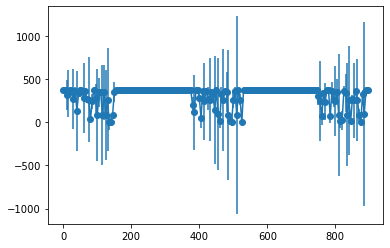

In [79]:
object_id = "plasticc_000000615"
obj_df = train_data[train_data.object_id == object_id]
obj_df.time -= _min.loc[object_id]
plt.errorbar(obj_df.time, obj_df.flux_err_u, yerr=obj_df.flux_u, fmt="o-")
# plt.errorbar(obj_df.time, obj_df.flux_err_g, yerr=obj_df.flux_g, fmt="o-")
t1 = obj_df.time.values

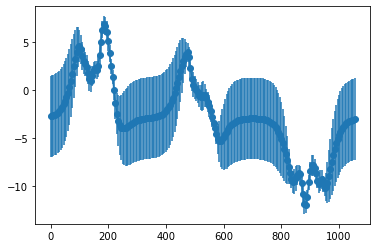

In [80]:
object_id = "plasticc_000000713"
obj_df = train_data[train_data.object_id == object_id]
obj_df.time -= _min.loc[object_id]
plt.errorbar(obj_df.time, obj_df.flux_u, yerr=obj_df.flux_err_u, fmt="o-")
# plt.errorbar(obj_df.time, obj_df.flux_err_g, yerr=obj_df.flux_g, fmt="o-")
t2 = obj_df.time.values

# For each band, create one line per object

In [81]:
num_objects = train_metadata.shape[0]
train_indices = np.random.permutation(num_objects)
train_indices, test_indices = train_indices[:int(num_objects*0.8)], train_indices[int(num_objects*0.8):]

In [87]:
"""Create a dataframe with three columns:
    abject_id: the object identifier,
    split: the split in which the object is. 
    pos: the position of the object in its corresponding split"""

pd.DataFrame({
    'object_id': train_metadata.index, 
    'split': ['test' if i in test_indices else 'train' for i in range(train_metadata.index.size)],
    'pos': [np.nonzero(test_indices==i)[0][0] if i in test_indices else np.nonzero(train_indices==i)[0][0] for i in range(train_metadata.index.size)]
}).to_csv('output/object2split.csv')

In [54]:
bands = ('u', 'g', 'i', 'r', 'y', 'z')

In [14]:
def object_per_band(band, is_err=False):
    meta_col = "sigma" if is_err else f"avg_{band}"
    df = pd.DataFrame(columns=range(max_length + 1))
    for i, obj_id in enumerate(train_metadata.index):
        row = train_data[train_data.object_id == obj_id][f"flux_{band}"].values
        tail = [train_metadata.loc[obj_id][meta_col]]*(max_length - object_size[obj_id])
        tail.append(train_metadata.loc[obj_id]["class"])
        row = np.concatenate((row, tail))
        df.loc[i] = row
    return df

In [88]:
df_u = object_per_band("u")
df_u.head()

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,-4.725665,-6.345849,-172.597460,-272.517049,-7.474273,-47.286139,-347.669543,-39.370396,-466.703874,-8.657043,...,-4.717097,-4.717097,-4.717097,-4.717097,-4.717097,-4.717097,-4.717097,-4.717097,-4.717097,92.0
1,-2.739472,-2.692420,-2.632676,-2.557057,-2.461685,-2.341883,-2.192082,-2.005754,-1.775399,-1.492649,...,-2.906212,-2.906212,-2.906212,-2.906212,-2.906212,-2.906212,-2.906212,-2.906212,-2.906212,88.0
2,3.166706,3.208780,3.243602,3.270145,3.287298,3.293860,3.288534,3.269931,3.236562,3.186843,...,-0.080564,-0.080564,-0.080564,-0.080564,-0.080564,-0.080564,-0.080564,-0.080564,-0.080564,42.0
3,-6.453884,-6.765390,-7.068537,-7.358818,-7.631006,-7.879095,-8.096256,-8.274816,-8.406275,-8.481378,...,0.765321,0.765321,0.765321,0.765321,0.765321,0.765321,0.765321,0.765321,0.765321,90.0
4,-0.979669,-1.000385,-1.016153,-1.026767,-1.032162,-1.032455,-1.027978,-1.019316,-1.007317,-0.993068,...,0.699470,0.699470,0.699470,0.699470,0.699470,0.699470,0.699470,0.699470,0.699470,90.0


In [93]:
df_u_err = object_per_band("err_u", True)
df_u_err.head()

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,369.933851,369.928141,316.033280,331.714911,369.929944,367.642927,274.851303,369.013881,133.576981,343.343235,...,369.933851,369.933851,369.933851,369.933851,369.933851,369.933851,369.933851,369.933851,369.933851,92.0
1,4.260001,4.259500,4.258687,4.257374,4.255268,4.251912,4.246600,4.238265,4.225303,4.205346,...,4.260782,4.260782,4.260782,4.260782,4.260782,4.260782,4.260782,4.260782,4.260782,88.0
2,8.150321,7.913339,7.665112,7.405539,7.134590,6.852324,6.558907,6.254634,5.939954,5.615505,...,11.930939,11.930939,11.930939,11.930939,11.930939,11.930939,11.930939,11.930939,11.930939,42.0
3,46.083322,45.268593,44.365551,43.367125,42.266181,41.055664,39.728792,38.279309,36.701833,34.992312,...,52.581154,52.581154,52.581154,52.581154,52.581154,52.581154,52.581154,52.581154,52.581154,90.0
4,27.044707,26.462025,25.826413,25.134764,24.384130,23.571828,22.695576,21.753676,20.745248,19.670554,...,32.428303,32.428303,32.428303,32.428303,32.428303,32.428303,32.428303,32.428303,32.428303,90.0


# Save the dataset to arff file

In [15]:
def df_to_arff_dict(dataset_name, data):
    attributes = [(str(c), 'NUMERIC') for c in data.columns.values[:-1]]
    t = data.columns[-1]
    attributes += [('target', data[t].unique().astype(str).tolist())]
    data = [data.loc[i].values[:-1].tolist() + [data[t].loc[i]] for i in range(data.shape[0])]
        
    return {
        'attributes': attributes,
        'data': data,
        'relation': dataset_name,
        'description': ''
    }

In [16]:
def save(dataset_name, data, suffix="TRAIN"):
    directory = f"{output_folder}/{dataset_name}"
    if not os.path.exists(directory):
        os.makedirs(directory)
    with open(f"{directory}/{dataset_name}_{suffix}.arff", "w", encoding="utf8") as f:
        ar.dump(df_to_arff_dict(dataset_name, data), f)

In [120]:
save( "plassticc_u", df_u.loc[train_indices].reset_index(drop=True), suffix="TRAIN")
save( "plassticc_u", df_u.loc[test_indices].reset_index(drop=True), suffix="TEST")
save( "plassticc_u", df_u_err.loc[train_indices].reset_index(drop=True), suffix="ERR_TRAIN")
save( "plassticc_u", df_u_err.loc[test_indices].reset_index(drop=True), suffix="ERR_TEST")

In [116]:
df_u.loc[train_indices]

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
565,31.901713,33.655089,35.440568,37.245901,39.055741,40.851061,42.608481,44.299465,45.889422,47.336676,...,0.365218,0.365218,0.365218,0.365218,0.365218,0.365218,0.365218,0.365218,0.365218,90.0
6447,-2.160360,5.517341,2146.599980,221.704655,-4.528751,-3.158191,-9.404473,-2.186261,-2.164350,-2.164342,...,-2.164342,-2.164342,-2.164342,-2.164342,-2.164342,-2.164342,-2.164342,-2.164342,-2.164342,64.0
7400,-4.271661,-4.506806,-4.002201,-2.090842,-0.165722,-13.842362,-4.353032,3.774518,-4.130306,-4.271506,...,-4.271546,-4.271546,-4.271546,-4.271546,-4.271546,-4.271546,-4.271546,-4.271546,-4.271546,16.0
3754,-19.656282,-21.227337,-22.843128,-24.469563,-26.060703,-27.556667,-28.881638,-29.942301,-30.627162,-30.807477,...,237.345715,227.599953,215.262322,201.253841,186.316435,171.031590,155.842254,141.075008,-4.156610,6.0
802,1.421723,1.551569,1.708260,1.896717,2.122532,2.391952,2.711806,3.089336,3.531870,4.046257,...,0.833020,0.833020,0.833020,0.833020,0.833020,0.833020,0.833020,0.833020,0.833020,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,1.755088,1.811465,1.881649,1.968592,2.075697,2.206795,2.366074,2.557914,2.786597,3.055829,...,2.152404,2.024702,1.922565,1.541186,1.541186,1.541186,1.541186,1.541186,1.541186,90.0
4701,0.592565,0.555247,0.324531,0.869297,-0.721835,1.774711,-5.265601,-3.864137,-4.341631,-1.061886,...,0.596842,0.596842,0.596842,0.596842,0.596842,0.596842,0.596842,0.596842,0.596842,64.0
7759,0.477660,-6.156753,-13.374881,-15.975478,-24.440123,-2.894562,-3.033439,0.487653,0.461836,-13.242377,...,0.492463,0.492463,0.492463,0.492463,0.492463,0.492463,0.492463,0.492463,0.492463,16.0
1172,3.373123,3.262342,2.639543,0.104929,2.578499,1.695369,5.567958,14.384490,5.055196,-7.347885,...,3.393460,3.393460,3.393460,3.393460,3.393460,3.393460,3.393460,3.393460,3.393460,16.0


# Put it all together

In [17]:
for band in bands:
    df = object_per_band(band)
    df_err = object_per_band(f"err_{band}", True)
    dataset_name = f"plassticc_5d_{band}"
    save( dataset_name, df.loc[train_indices].reset_index(drop=True), suffix="TRAIN")
    save( dataset_name, df.loc[test_indices].reset_index(drop=True), suffix="TEST")
    save( dataset_name, df_err.loc[train_indices].reset_index(drop=True), suffix="ERR_TRAIN")
    save( dataset_name, df_err.loc[test_indices].reset_index(drop=True), suffix="ERR_TEST")